# **Prediction using Unsupervised ML**

Let's begin with loading the libraries and dataset

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
%matplotlib inline

In [2]:
# Load Iris dataset
iris=datasets.load_iris()
print(iris.keys()) #Contents in iris dataset


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
#convert the features in iris dataset into a dataframe
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Choosing the right K**

We'll use the Elbow method to find the optimum number of clusters for K Means.
The way to evaluate the choice of K is made using a parameter known as WCSS. WCSS stands for Within Cluster Sum of Squares.

In [4]:
X = iris_df.iloc[:,0:4].values 

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


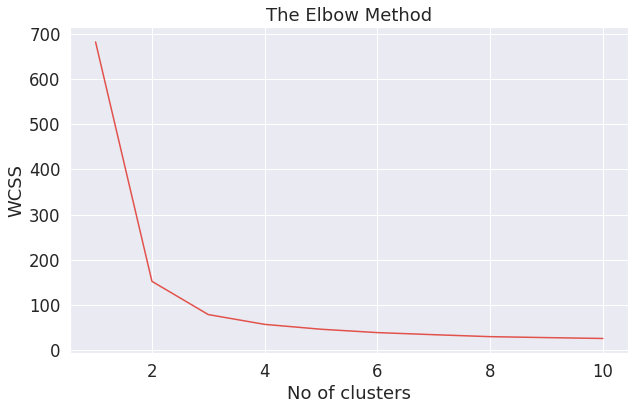

In [5]:
# Plotting the WCSS 
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel("No of clusters")
plt.ylabel('WCSS')
plt.title('The Elbow Method');


 In the depiction above we can see that after 3 there's no significant decrease in WCSS so 3 is the best here. Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. 

In [6]:
#Apply KMeans to dataset with 3 clusters
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

## **Let's visualize the clusters**

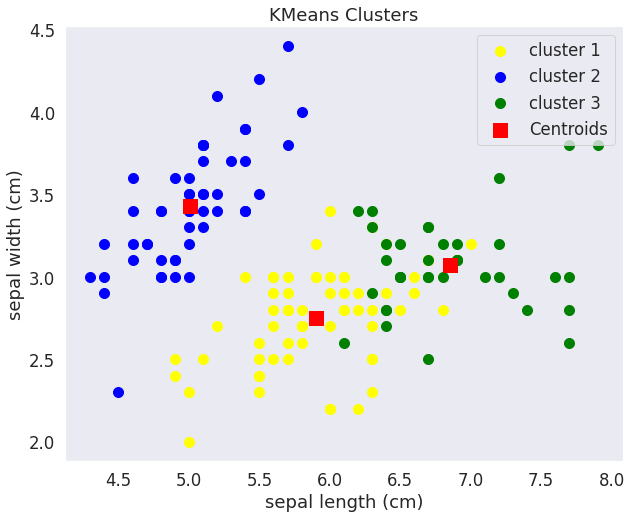

In [7]:
#Lets plot clusters between two features sepal width vs sepal length
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'cluster 3')
plt.xlabel('sepal length (cm)')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'red', label = 'Centroids',marker=',')
plt.grid(False)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('KMeans Clusters')
plt.legend();

**Since we already know the the catagory/clusters in our data which is the type of flowering plants we can compare our findings with the answer.(In the real world data this will not be the case)**

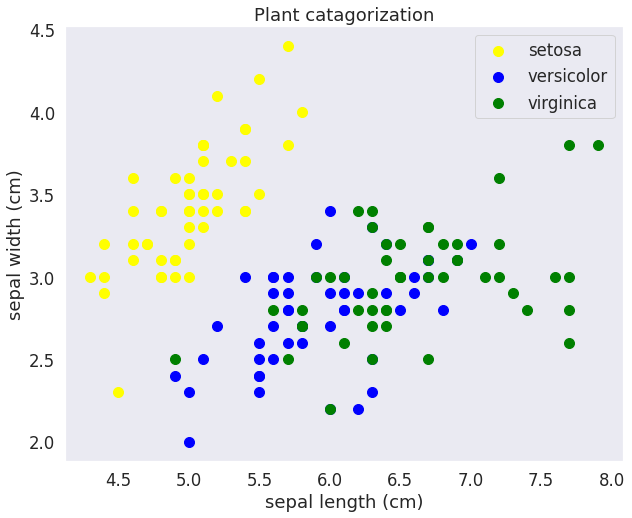

In [8]:
#Let's plot the feature data with target(given in dataset) as clusters
plt.figure(figsize=(10,8))
plt.scatter(X[iris.target == 0, 0], X[iris.target == 0, 1], 
            s = 100, c = 'yellow', label = 'setosa')
plt.scatter(X[iris.target == 1, 0], X[iris.target == 1, 1], 
            s = 100, c = 'blue', label = 'versicolor')
plt.scatter(X[iris.target == 2, 0], X[iris.target == 2, 1],
            s = 100, c = 'green', label = 'virginica')
plt.grid(False)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Plant catagorization')
plt.legend();


From the above two plots we can see that satosa has been clustered perfectly due to its distinct feature but versicolor and verginica have not been clustered perfectly.(Donot campare the colors between the two plots for floweing plants as KMeans names clusters randomly and does not follow a order in naming clusters)



.

**We can also plot the above two plots using seaborn but it is easy to customize individual elements by just using matplotlib**

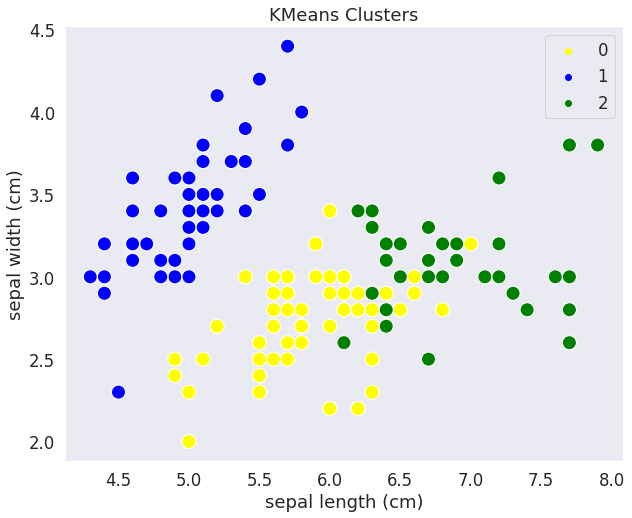

In [9]:
#Plotting using seaborn
plt.figure(figsize=(10,8))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_kmeans,palette={0:'yellow',1:'blue',2:'green'},s=200);
plt.grid(False)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('KMeans Clusters')
plt.legend();

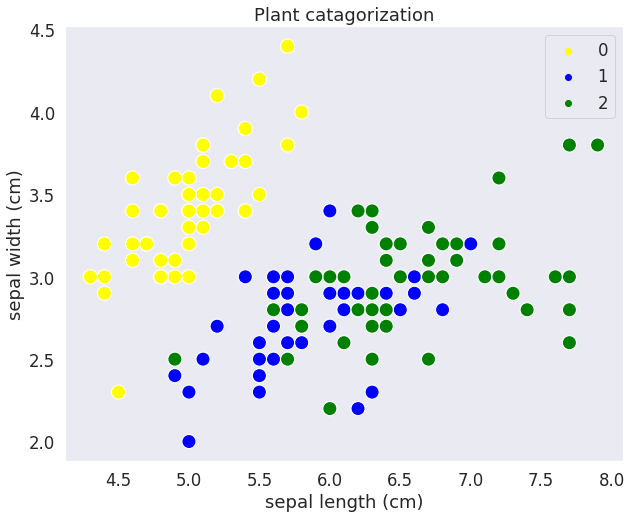

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=iris.target,palette={0:'yellow',1:'blue',2:'green'},s=200);
plt.grid(False)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Plant catagorization')
plt.legend();